In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
#Requirements: Read in your dataset, determine how many samples are present
admissions = pd.read_csv('/Users/yuka/dat-2017-11-14/unit-projects/project-2/assets/admissions.csv')
len(admissions) #400 observations
admissions. head()
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [46]:
admissions.columns #Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

In [18]:
# Id the admit column in the missing data:
admissions[pd.isnull(admissions['admit'])==True] # no missing data


,admit,gre,gpa,prestige


In [17]:
# Id the gre column in the missing data:
admissions[pd.isnull(admissions['gre'])==True] 


,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [19]:
# Id the gpa column in the missing data:
admissions[pd.isnull(admissions['gpa'])==True] 

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


In [20]:
# Id the prestige column in the missing data:
admissions[pd.isnull(admissions['prestige'])==True] 

,admit,gre,gpa,prestige
236,1,660.0,NaN,NaN


In [25]:
#Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation)
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


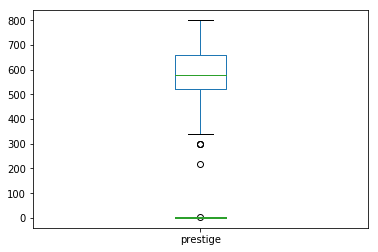

In [37]:
#Plot box plots for each variable
#Plot box plot for admit
admissions['admit'].plot(kind='box')


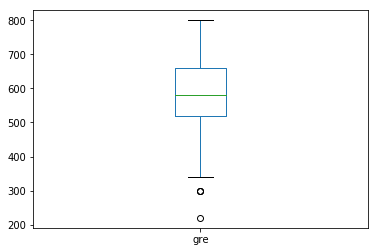

In [38]:
#Plot box plot for gre

admissions['gre'].plot(kind='box')

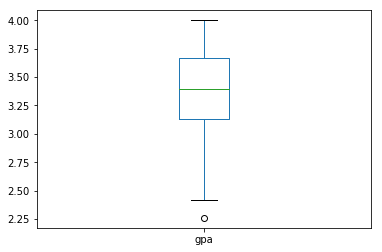

In [39]:
#Plot box plot for gpa

admissions['gpa'].plot(kind='box')

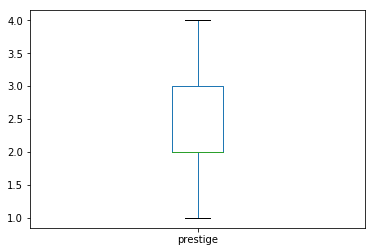

In [41]:
#Plot box plot for prestige

admissions['prestige'].plot(kind='box')

In [43]:
#Create a covariance matrix
admissions.shape  # dimension (400, 4)


(400, 4)

In [45]:
np.cov(admissions)

array([[  35685.06969167,   62096.75800833,   75371.84166667, ...,
          43302.61440833,   65938.77995833,   56455.20239167],
       [  62096.75800833,  108059.22055833,  131161.05833333, ...,
          75353.59135833,  114744.68720833,   98240.90490833],
       [  75371.84166667,  131161.05833333,  159203.        , ...,
          91463.19166667,  139276.04166667,  119243.40833333],
       ..., 
       [  43302.61440833,   75353.59135833,   91463.19166667, ...,
          52546.88589167,   80015.68654167,   68507.135175  ],
       [  65938.77995833,  114744.68720833,  139276.04166667, ...,
          80015.68654167,  121843.94729167,  104319.072125  ],
       [  56455.20239167,   98240.90490833,  119243.40833333, ...,
          68507.135175  ,  104319.072125  ,   89315.088025  ]])

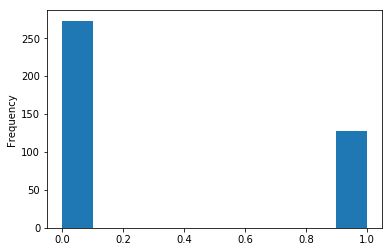

In [47]:
# histogram for admit:

admissions['admit'].plot(kind='hist')


#Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

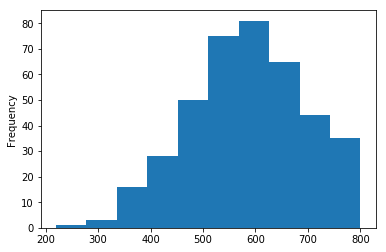

In [48]:
# histogram for gre
admissions['gre'].plot(kind='hist') #negatively skewed

In [106]:
admissions['gre'].skew() ## Skewness: -0.15012666594587223

-0.15012666594587223

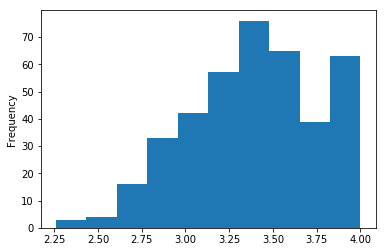

In [49]:
# histogram for gpa
admissions['gpa'].plot(kind='hist') # negatively skewed

In [107]:
admissions['gpa'].skew() ## The skewness for gpa is -0.21176549033509626

-0.21176549033509626

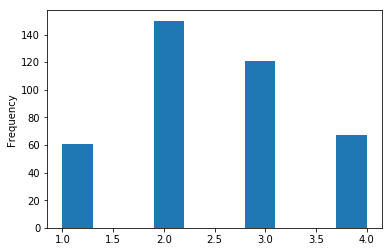

In [50]:
#histogram for prestige
admissions['prestige'].plot(kind='hist')

In [94]:
# identify the outlier for the gpa field
gpa_q3=admissions.quantile(.75)['gpa']
gpa_q1=admissions.quantile(.25)['gpa']
gpa_interquantile=gpa_q3- gpa_q1
gpa_min=gpa_q1-1.5*gpa_interquantile
gpa_max=gpa_q3+1.5*gpa_interquantile
admissions


#Here's the record for the gpa outlier
admissions[(admissions.gpa<gpa_min)|(admissions.gpa>gpa_max)]

## one outlier for gpa

,admit,gre,gpa,prestige
289,0,420.0,2.26,4.0


In [99]:
#Indentify the outlier for gre field

gre_q3=admissions['gre'].quantile(.75)
gre_q1=admissions['gre'].quantile(.25)
gre_interquatile=gre_q3-gre_q1
gre_min=gre_q1-1.5*gre_interquatile*1.5
gre_max=gre_q3+1.5*gre_interquatile*1.5

#here's the record for the gre outlier
admissions[(admissions.gre<gre_min)|(admissions.gre>gre_max)]

## no outlier for the gre




,admit,gre,gpa,prestige


In [108]:
## Determine any issues or limitations, based on your exploratory analysis:
# Below are the limitations:
# 1. gre and gpa are skewed. They are not normally distributed.
# 2. There's one outlier that needs to be taken care of for gpa.
# 3. there are 2 missing values for gpa, 1 missing value for prestige and 2 missing values for gre.


In [146]:
# Bonus:
# 1.Replace missing values using the median replacement method
admissions_media_replace_missingvalue=admissions.copy()

admissions_media_replace_missingvalue['prestige'].median() #2.0
admissions_media_replace_missingvalue['gre'].median() #580.0
admissions_media_replace_missingvalue['gpa'].median() #3.395
np.unique(admissions_media_replace_missingvalue['prestige'])

admissions_media_replace_missingvalue[pd.isnull(admissions_media_replace_missingvalue['gpa'])==True]['gpa']
#187 and 236 have missing values.
admissions_media_replace_missingvalue.loc[187, 'gpa']=3.395
admissions_media_replace_missingvalue.loc[236, 'gpa']=3.395

admissions_media_replace_missingvalue[pd.isnull(admissions_media_replace_missingvalue['gre'])==True]['gre']
# 187 and 212 have missing values.
admissions_media_replace_missingvalue.loc[187, 'gre']=580.0
admissions_media_replace_missingvalue.loc[212, 'gre']=580.0

admissions_media_replace_missingvalue[pd.isnull(admissions_media_replace_missingvalue['prestige'])==True]['prestige']
#236 has a missing value.
admissions_media_replace_missingvalue.loc[236, 'prestige']=2.0


0    0.226483
1    0.223587
2    0.206674
3    0.245409
4    0.256082
Name: gpa_transformed, dtype: float64

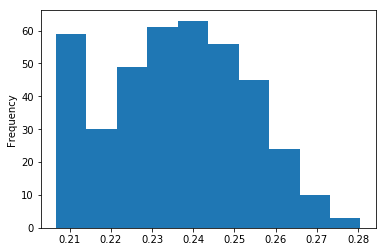

In [207]:
#Log transform data to meet normality requirements
# Tranform the "gpa" field
admissions_media_replace_missingvalue['gpa'].skew() ##-0.2124543021367569
admissions_media_replace_missingvalue['gpa'].max() #4.0
np.log10(np.log10(4+5-admissions_media_replace_missingvalue.gpa)).skew() ##0.00074542413719007664
np.log10(np.log(4+5-admissions_media_replace_missingvalue.gpa)).plot(kind="hist")

admissions_media_replace_missingvalue["gpa_transformed"]=np.log10(np.log(4+5-admissions_media_replace_missingvalue.gpa))

admissions_media_replace_missingvalue["gpa_transformed"].head()


In [ ]:
admissions_mean_replace_missingvalue.loc[:, "gpa"].replace(admissions.gpa.mean(), 0, inplace=True)
admissions_mean_replace_missingvalue[pd.isnull(gpa)==True]


admissions_mean_replace_missingvalue.loc[:, "admit"].replace(admissions.admit.mean(), 0, inplace=True)
admissions_mean_replace_missingvalue[pd.isnull(admit)==True]


admissions_mean_replace_missingvalue.loc[:, "prestige"].replace(admissions.prestige.mean(), 0, inplace=True)
admissions_mean_replace_missingvalue[pd.isnull(prestige)==True]


In [239]:
#Advanced Option: Replace missing values using multiple imputation methods
# Method 1: replace the missing values with mean
admissions_mean_replace_missingvalue['prestige'].mean() #2.4862155388471177
admissions_mean_replace_missingvalue['gre'].mean() #588.0402010050251
admissions_mean_replace_missingvalue['gpa'].mean() #3.3909296482412077


admissions_mean_replace_missingvalue[pd.isnull(admissions_mean_replace_missingvalue['gpa'])==True]['gpa']
#187 and 236 have missing values.
admissions_mean_replace_missingvalue.loc[187, 'gpa']=3.3909296482412077
admissions_mean_replace_missingvalue.loc[236, 'gpa']=3.3909296482412077

admissions_media_replace_missingvalue[pd.isnull(admissions_media_replace_missingvalue['gre'])==True]['gre']
# 187 and 212 have missing values.
admissions_mean_replace_missingvalue.loc[187, 'gre']=588.0402010050251
admissions_mean_replace_missingvalue.loc[212, 'gre']=588.0402010050251

admissions_mean_replace_missingvalue[pd.isnull(admissions_mean_replace_missingvalue['prestige'])==True]['prestige']
#236 has a missing value.
admissions_mean_replace_missingvalue.loc[236, 'prestige']=2.4862155388471177



